<a href="https://colab.research.google.com/github/SSimhadri-16/Databases-SQL-for-DataScience-with-Python/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

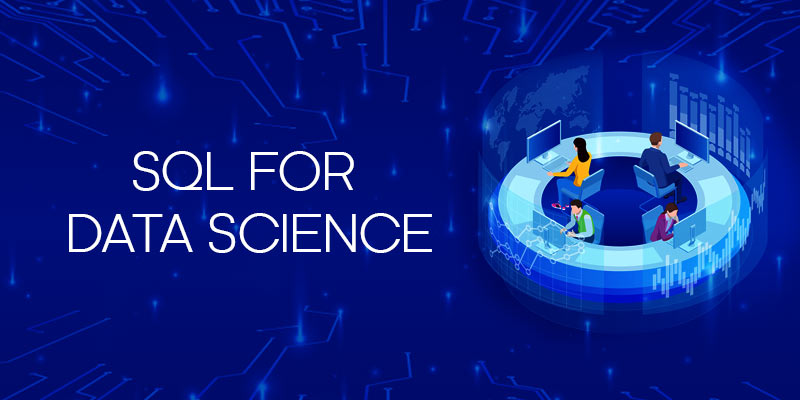 

### Connect to the database

Let us first load the SQL extension and establish a connection with the database

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you may need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [ ]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
# !pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
# !pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
# !pip install ipython-sql

In [ ]:
%load_ext sql

In the next cell enter your db2 connection string.From your Db2 service credentials copy everything after db2:// (except the double quote at the end) and paste it in the cell below after ibm_db_sa://

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/images/details.png">


In [ ]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name?security=SSL
# Enter the connection string for your Db2 on Cloud database instance below
%sql ibm_db_sa://

'Connected: lqz68926@bludb'

Execution of SQL queries 


##### 1. Find the total number of crimes recorded in the CRIME table.


In [ ]:
%sql SELECT COUNT(ID) AS TOTAL_CRIMES FROM CHICAGO_CRIME_DATA

 * ibm_db_sa://lqz68926:***@ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:31321/bludb
Done.


total_crimes
533




##### 2. List community areas with per capita income less than 11000.


In [ ]:
%sql SELECT COMMUNITY_AREA_NAME, PER_CAPITA_INCOME FROM CENSUS_DATA WHERE PER_CAPITA_INCOME<11000

 * ibm_db_sa://lqz68926:***@ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:31321/bludb
Done.


community_area_name,per_capita_income
West Garfield Park,10934
South Lawndale,10402
Fuller Park,10432
Riverdale,8201




##### 3.List all case numbers for crimes  involving minors?(children are not considered minors for the purposes of crime analysis)



In [ ]:
%sql SELECT CASE_NUMBER FROM CHICAGO_CRIME_DATA \
WHERE PRIMARY_TYPE LIKE '%MINOR%' OR DESCRIPTION LIKE '%MINOR%'

 * ibm_db_sa://lqz68926:***@ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:31321/bludb
Done.


case_number
HL266884
HK238408




##### 4. List all kidnapping crimes involving a child?


In [ ]:
%sql SELECT ID, CASE_NUMBER, PRIMARY_TYPE, DESCRIPTION, LOCATION_DESCRIPTION FROM CHICAGO_CRIME_DATA \
WHERE PRIMARY_TYPE = 'KIDNAPPING' AND (PRIMARY_TYPE LIKE '%CHILD%' OR DESCRIPTION LIKE '%CHILD%')

 * ibm_db_sa://lqz68926:***@ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:31321/bludb
Done.


id,case_number,primary_type,description,location_description
5276766,HN144152,KIDNAPPING,CHILD ABDUCTION/STRANGER,STREET




##### 5. What kinds of crimes were recorded at schools?


In [ ]:
%sql SELECT DISTINCT(PRIMARY_TYPE) FROM CHICAGO_CRIME_DATA WHERE LOCATION_DESCRIPTION LIKE '%SCHOOL%'

 * ibm_db_sa://lqz68926:***@ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:31321/bludb
Done.


primary_type
ASSAULT
BATTERY
CRIMINAL DAMAGE
CRIMINAL TRESPA
NARCOTICS
PUBLIC PEACE VI




##### 6. List the average safety score for each type of school.


In [ ]:
%sql SELECT AVG(SAFETY_SCORE) AS AVG_SAFETY_SCORE,ELEMENTARY__MIDDLE__OR_HIGH_SCHOOL FROM CHICAGO_PUBLIC_SCHOOLS \
GROUP BY ELEMENTARY__MIDDLE__OR_HIGH_SCHOOL

 * ibm_db_sa://lqz68926:***@ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:31321/bludb
Done.


avg_safety_score,elementary__middle__or_high_school
49,ES
49,HS
48,MS




##### 7. List 5 community areas with highest % of households below poverty line 


In [ ]:
%sql SELECT COMMUNITY_AREA_NAME FROM CENSUS_DATA \
ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC FETCH FIRST 5 ROWS ONLY

 * ibm_db_sa://lqz68926:***@ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:31321/bludb
Done.


community_area_name
Riverdale
Fuller Park
Englewood
North Lawndale
East Garfield Park




##### 8. Which community area is most crime prone?


In [ ]:
%sql SELECT COMMUNITY_AREA_NUMBER, COUNT(*) AS NO_OF_CRIMES FROM CHICAGO_CRIME_DATA \
GROUP BY COMMUNITY_AREA_NUMBER ORDER BY NO_OF_CRIMES DESC LIMIT 1

 * ibm_db_sa://lqz68926:***@ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:31321/bludb
Done.


community_area_number,no_of_crimes
25,43




##### 9. Use a sub-query to find the name of the community area with highest hardship index


In [ ]:
%sql SELECT COMMUNITY_AREA_NAME FROM CENSUS_DATA \
WHERE HARDSHIP_INDEX = (SELECT MAX(HARDSHIP_INDEX) FROM CENSUS_DATA)

 * ibm_db_sa://lqz68926:***@ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:31321/bludb
Done.


community_area_name
Riverdale




##### 10. Use a sub-query to determine the Community Area Name with most number of crimes?


In [ ]:
%sql SELECT COMMUNITY_AREA_NAME FROM CENSUS_DATA \
WHERE COMMUNITY_AREA_NUMBER = (SELECT COMMUNITY_AREA_NUMBER FROM CHICAGO_CRIME_DATA \
                               GROUP BY COMMUNITY_AREA_NUMBER ORDER BY COUNT(ID) DESC LIMIT 1)

 * ibm_db_sa://lqz68926:***@ba99a9e6-d59e-4883-8fc0-d6a8c9f7a08f.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:31321/bludb
Done.


community_area_name
Austin
